# Breast Cancer Detection



### Import ML packages

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

### Load and Read Dataset

In [121]:
# Load Dataset
df = pd.read_csv('/content/tumor.csv')

In [122]:
df.head()

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [123]:
#Shape of the Dataset
df.shape

(683, 10)

### Data pre-processing

In [125]:
# Columns in the dataset
df.columns

Index(['ClumpThickness', 'UniformityofCellSize', 'UniformityofCellShape',
       'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei',
       'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class'],
      dtype='object')

### Handling missing values

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ClumpThickness            683 non-null    int64
 1   UniformityofCellSize      683 non-null    int64
 2   UniformityofCellShape     683 non-null    int64
 3   MarginalAdhesion          683 non-null    int64
 4   SingleEpithelialCellSize  683 non-null    int64
 5   BareNuclei                683 non-null    int64
 6   BlandChromatin            683 non-null    int64
 7   NormalNucleoli            683 non-null    int64
 8   Mitoses                   683 non-null    int64
 9   Class                     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [127]:
#Diagnosis Class Malignant = 4 and Benign = 2
#The number of Benign and Maglinant cases from the dataset
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [128]:
df['BareNuclei'].value_counts()

BareNuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

In [129]:
df[df['BareNuclei'] == '?']

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class


In [130]:
df[df['BareNuclei'] == '?'].sum()

ClumpThickness              0.0
UniformityofCellSize        0.0
UniformityofCellShape       0.0
MarginalAdhesion            0.0
SingleEpithelialCellSize    0.0
BareNuclei                  0.0
BlandChromatin              0.0
NormalNucleoli              0.0
Mitoses                     0.0
Class                       0.0
dtype: float64

In [131]:
df.replace('?',np.nan,inplace=True)

In [132]:
df['BareNuclei'][23]

1

In [133]:
df.isna().sum()

ClumpThickness              0
UniformityofCellSize        0
UniformityofCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64

In [134]:
df.fillna(method='ffill', inplace=True)

In [135]:
df.isna().sum()

ClumpThickness              0
UniformityofCellSize        0
UniformityofCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64

In [136]:
df['BareNuclei'] = df['BareNuclei'].astype('int64')

### Exploratory Data Analysis

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ClumpThickness            683 non-null    int64
 1   UniformityofCellSize      683 non-null    int64
 2   UniformityofCellShape     683 non-null    int64
 3   MarginalAdhesion          683 non-null    int64
 4   SingleEpithelialCellSize  683 non-null    int64
 5   BareNuclei                683 non-null    int64
 6   BlandChromatin            683 non-null    int64
 7   NormalNucleoli            683 non-null    int64
 8   Mitoses                   683 non-null    int64
 9   Class                     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [138]:
df.describe()

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Bivariate Data Analysis

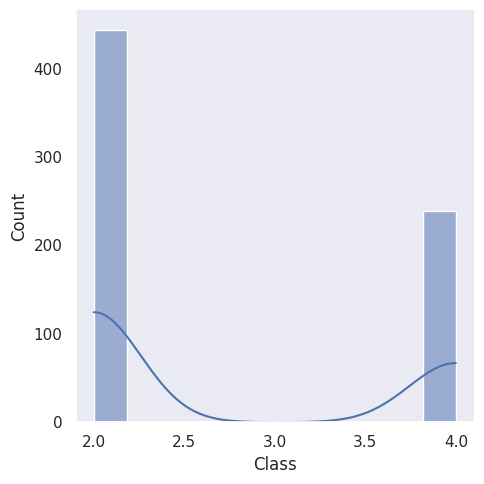

In [139]:
sns.displot(df['Class'],kde=True)

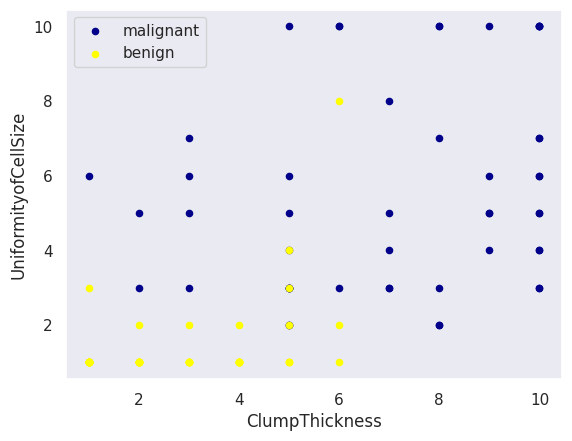

In [140]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='ClumpThickness', y='UniformityofCellSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='ClumpThickness', y='UniformityofCellSize', color='Yellow', label='benign', ax=ax);
plt.show()

### Multivariate Data Analysis

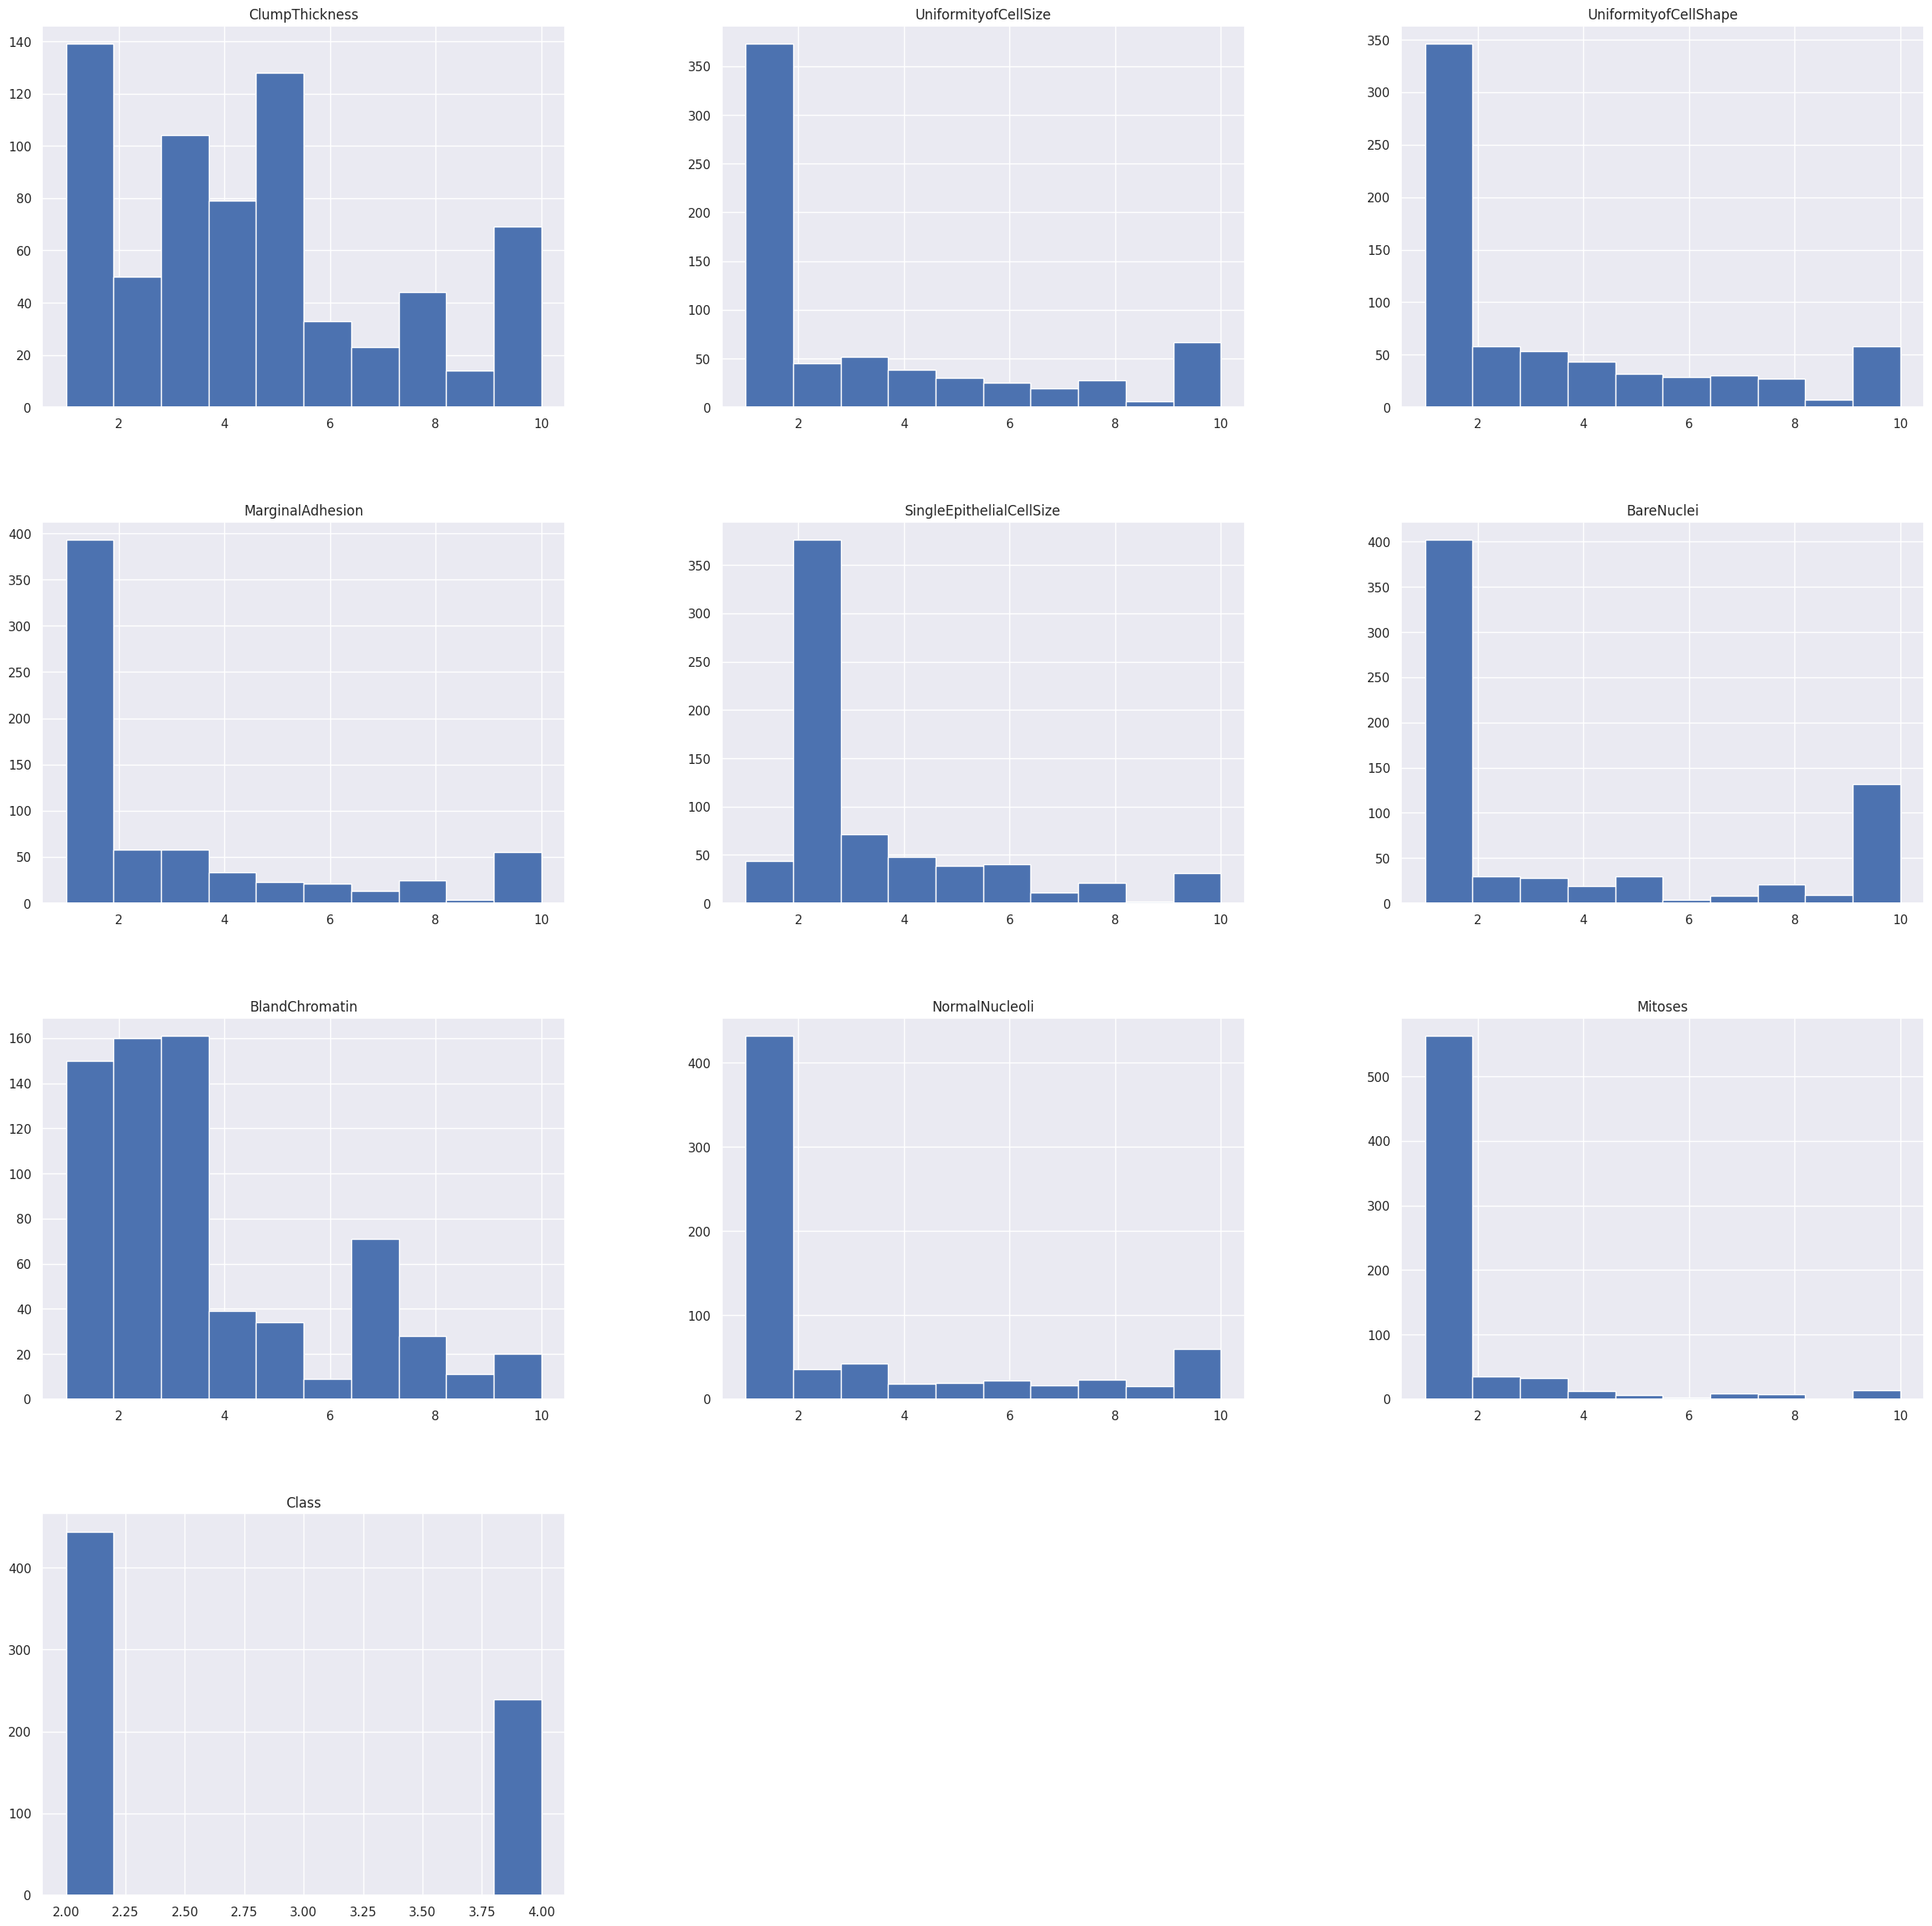

In [141]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

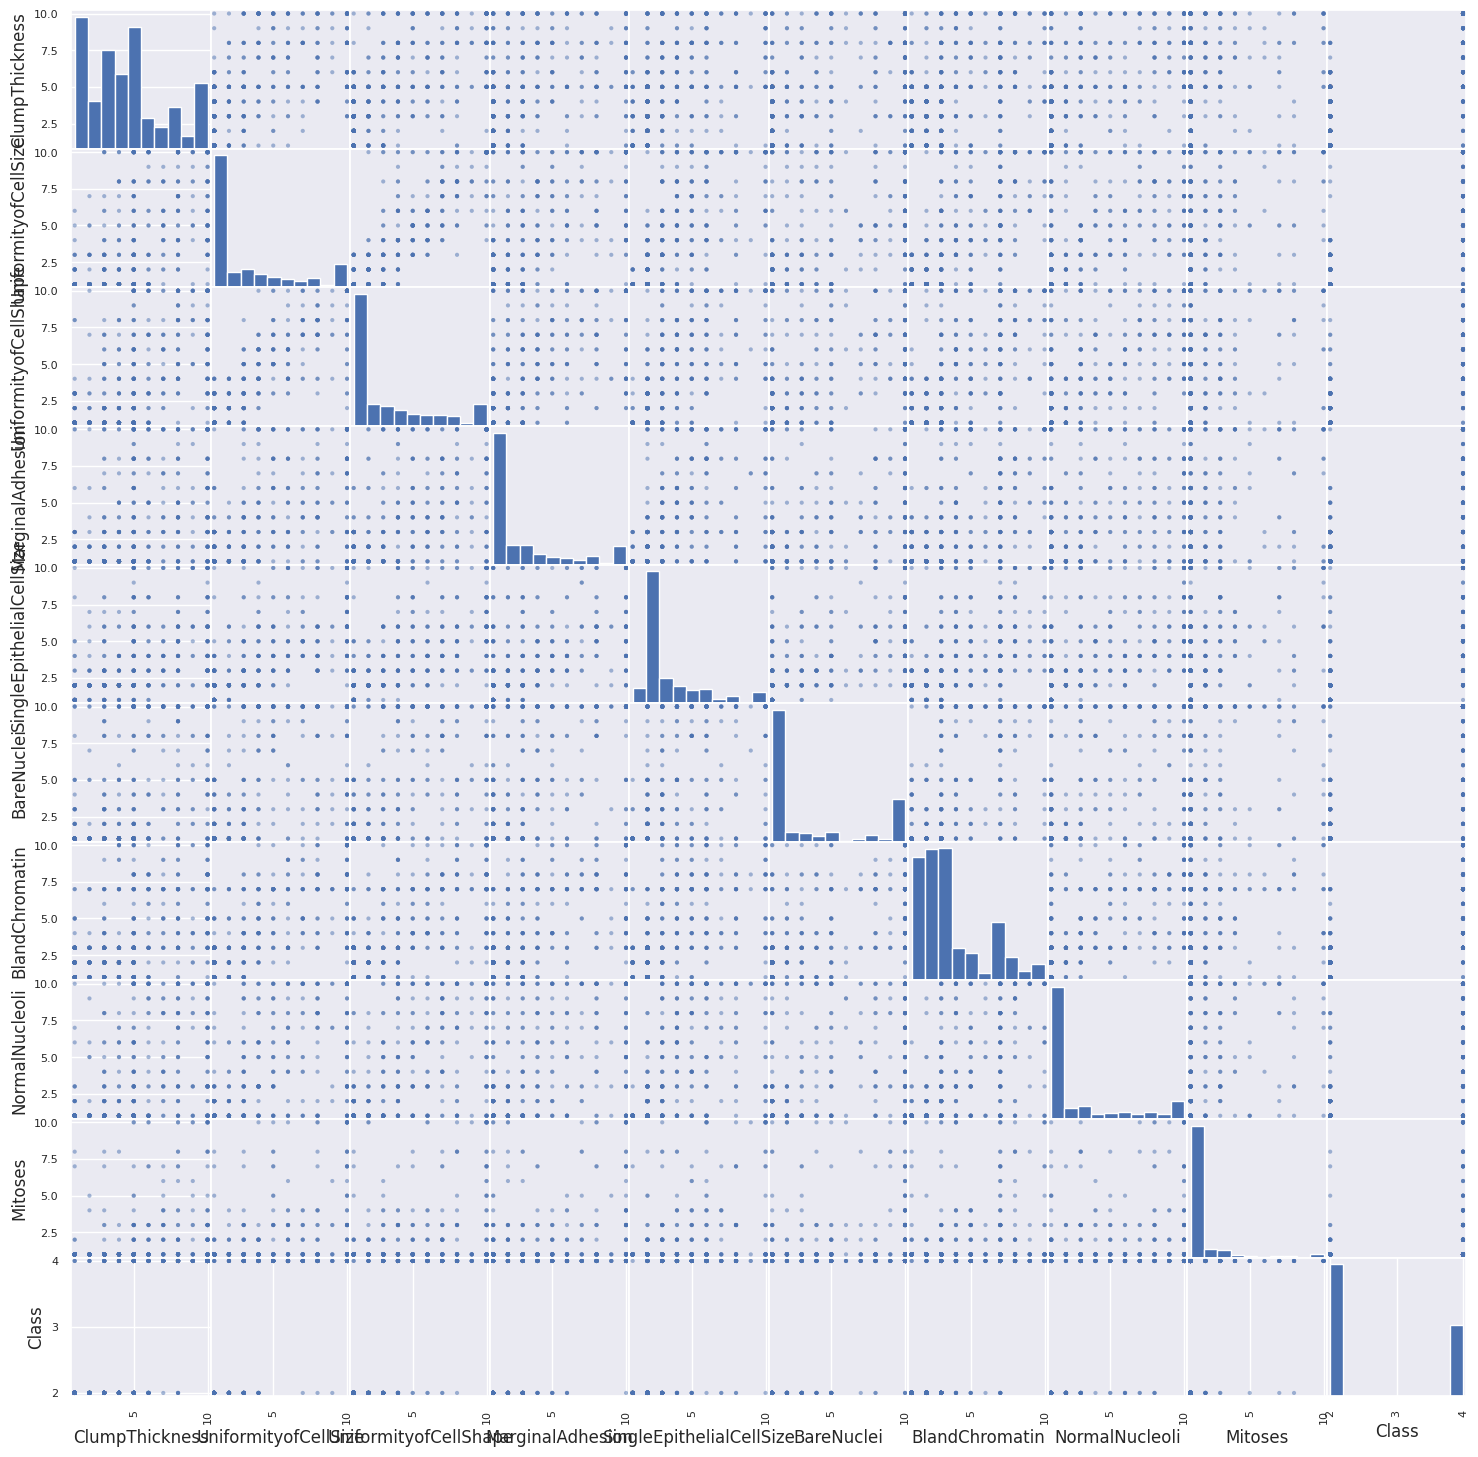

In [142]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

<Axes: >

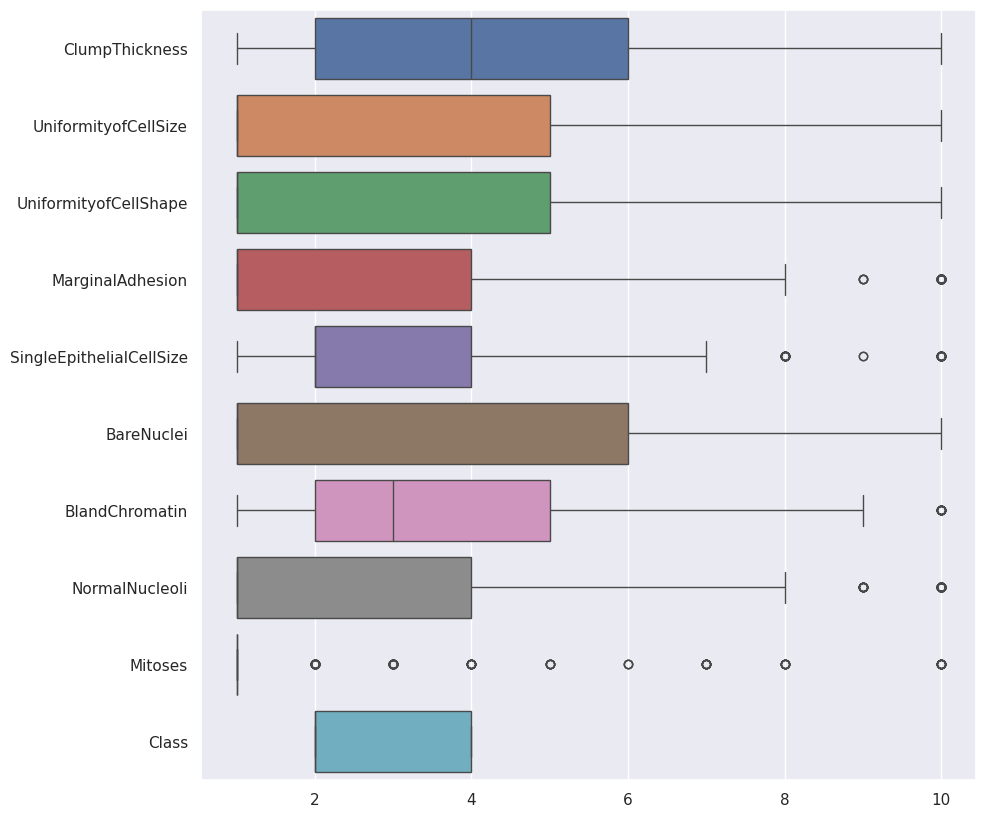

In [143]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

### Feature selection

In [144]:
df.corr()

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
ClumpThickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
UniformityofCellSize,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
UniformityofCellShape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
MarginalAdhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
SingleEpithelialCellSize,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
BareNuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
BlandChromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
NormalNucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


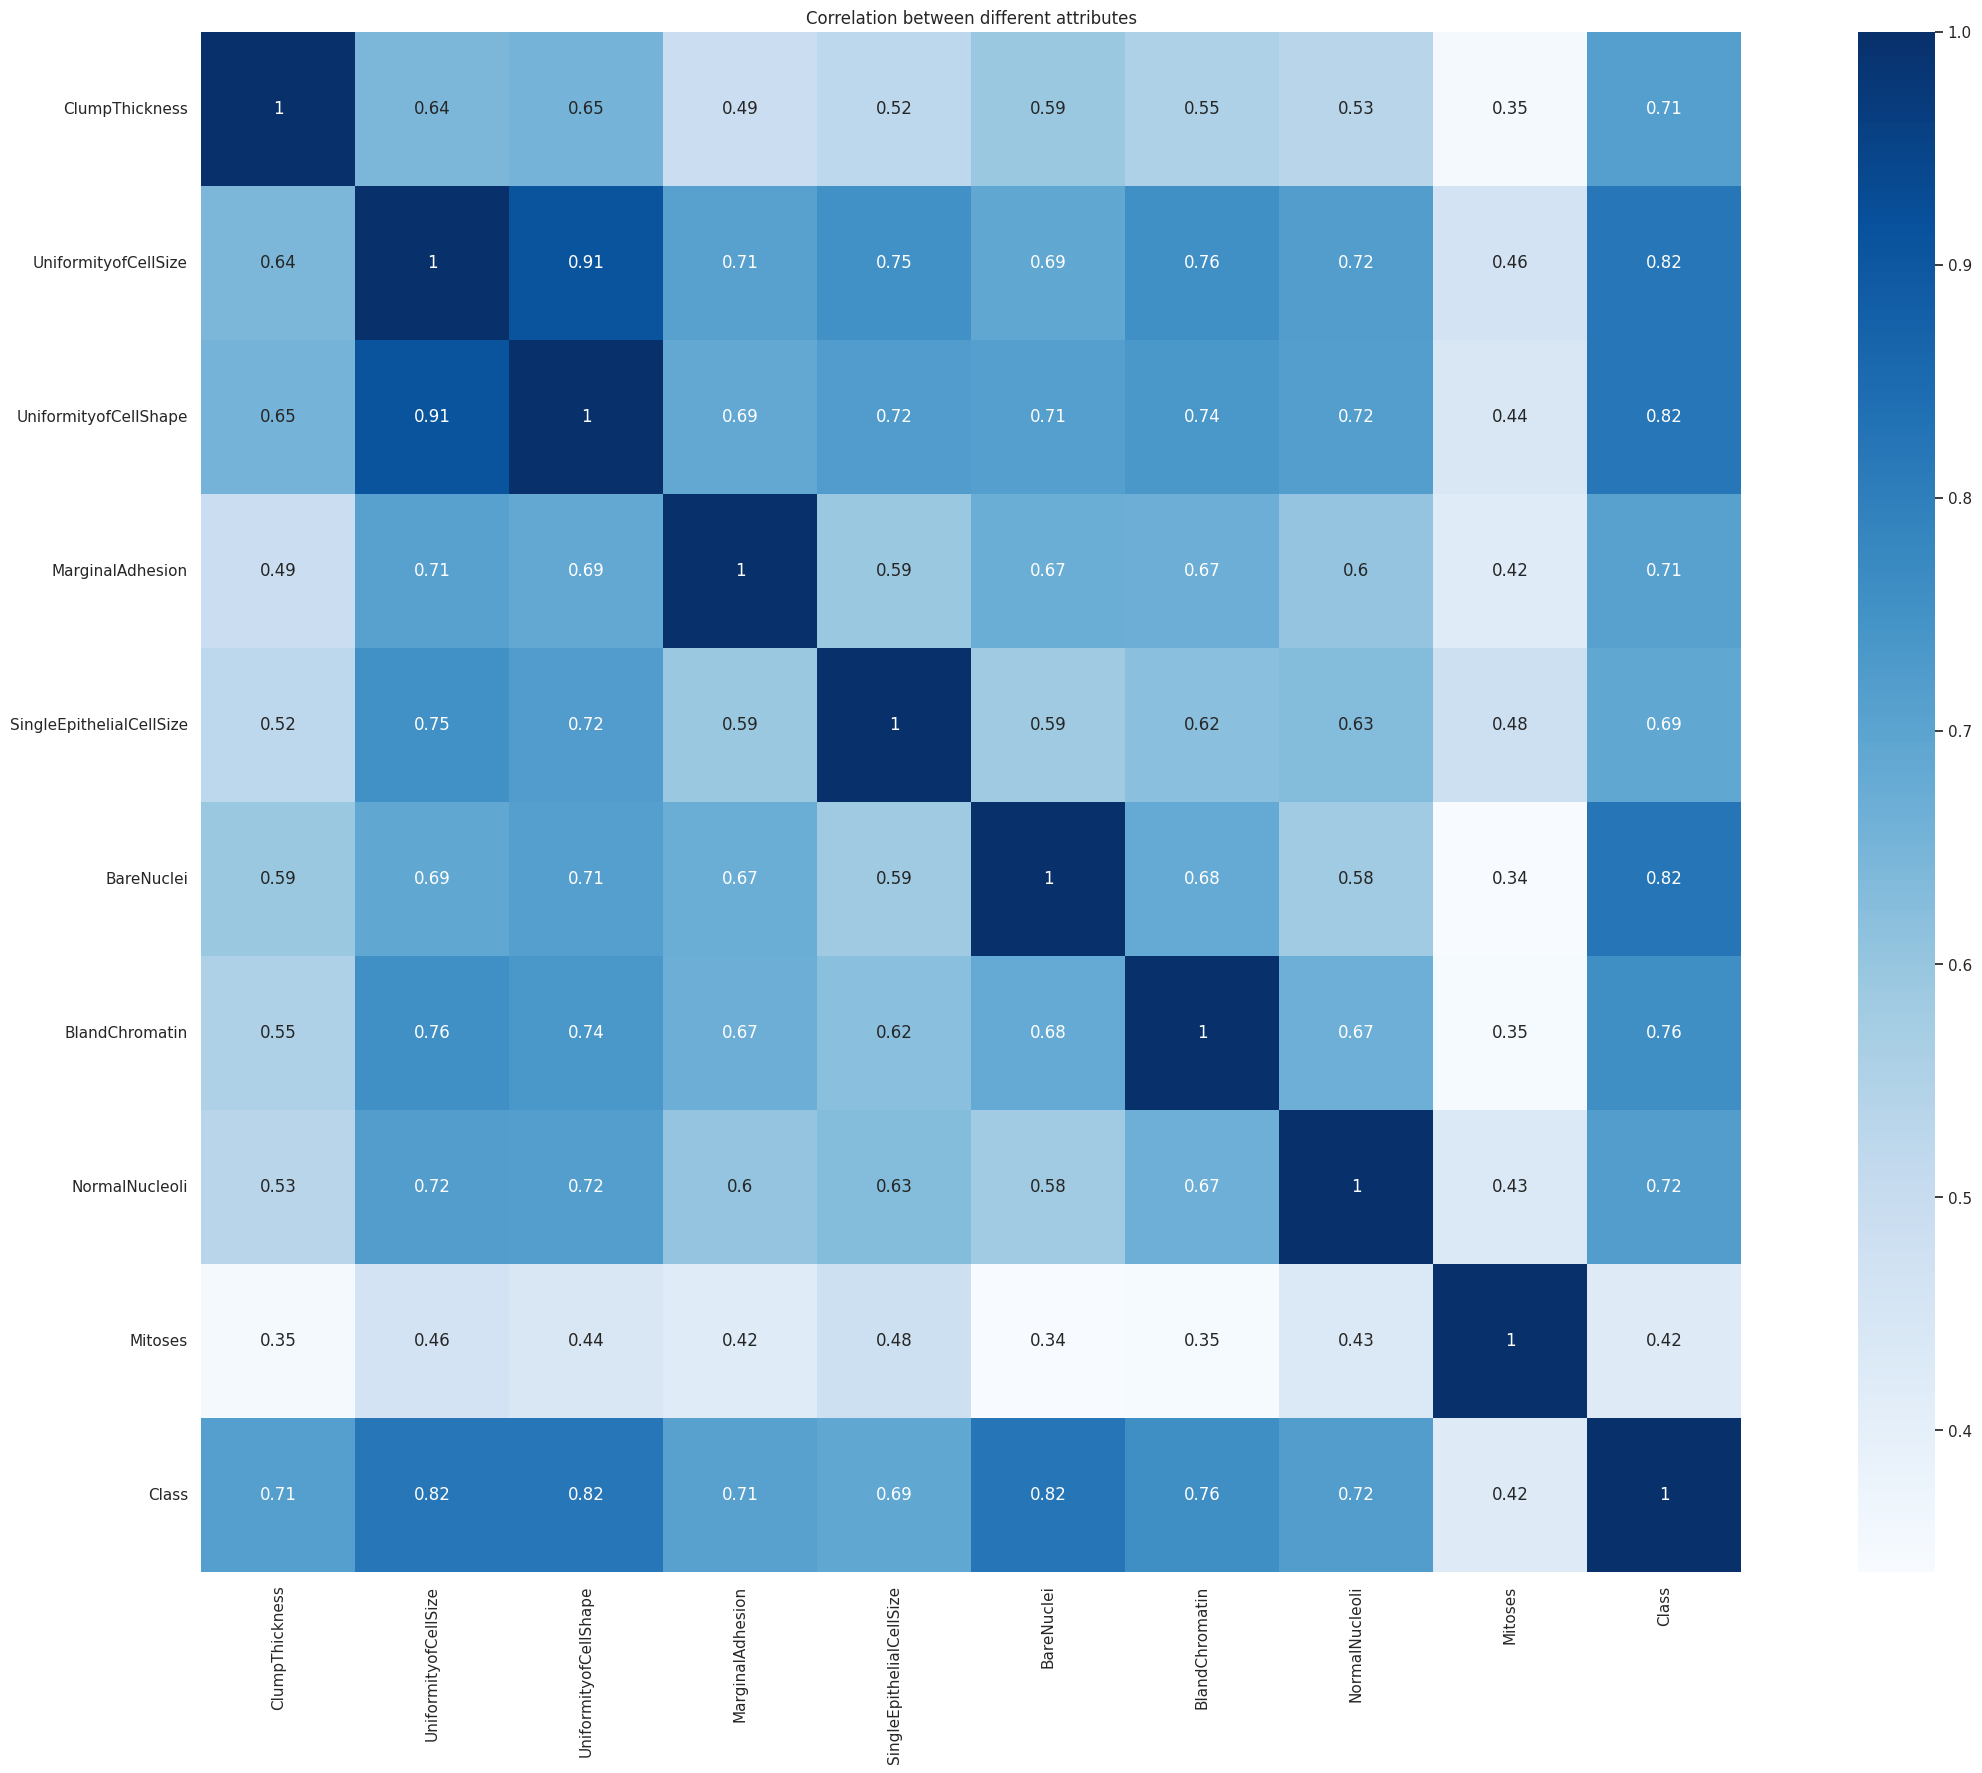

In [145]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

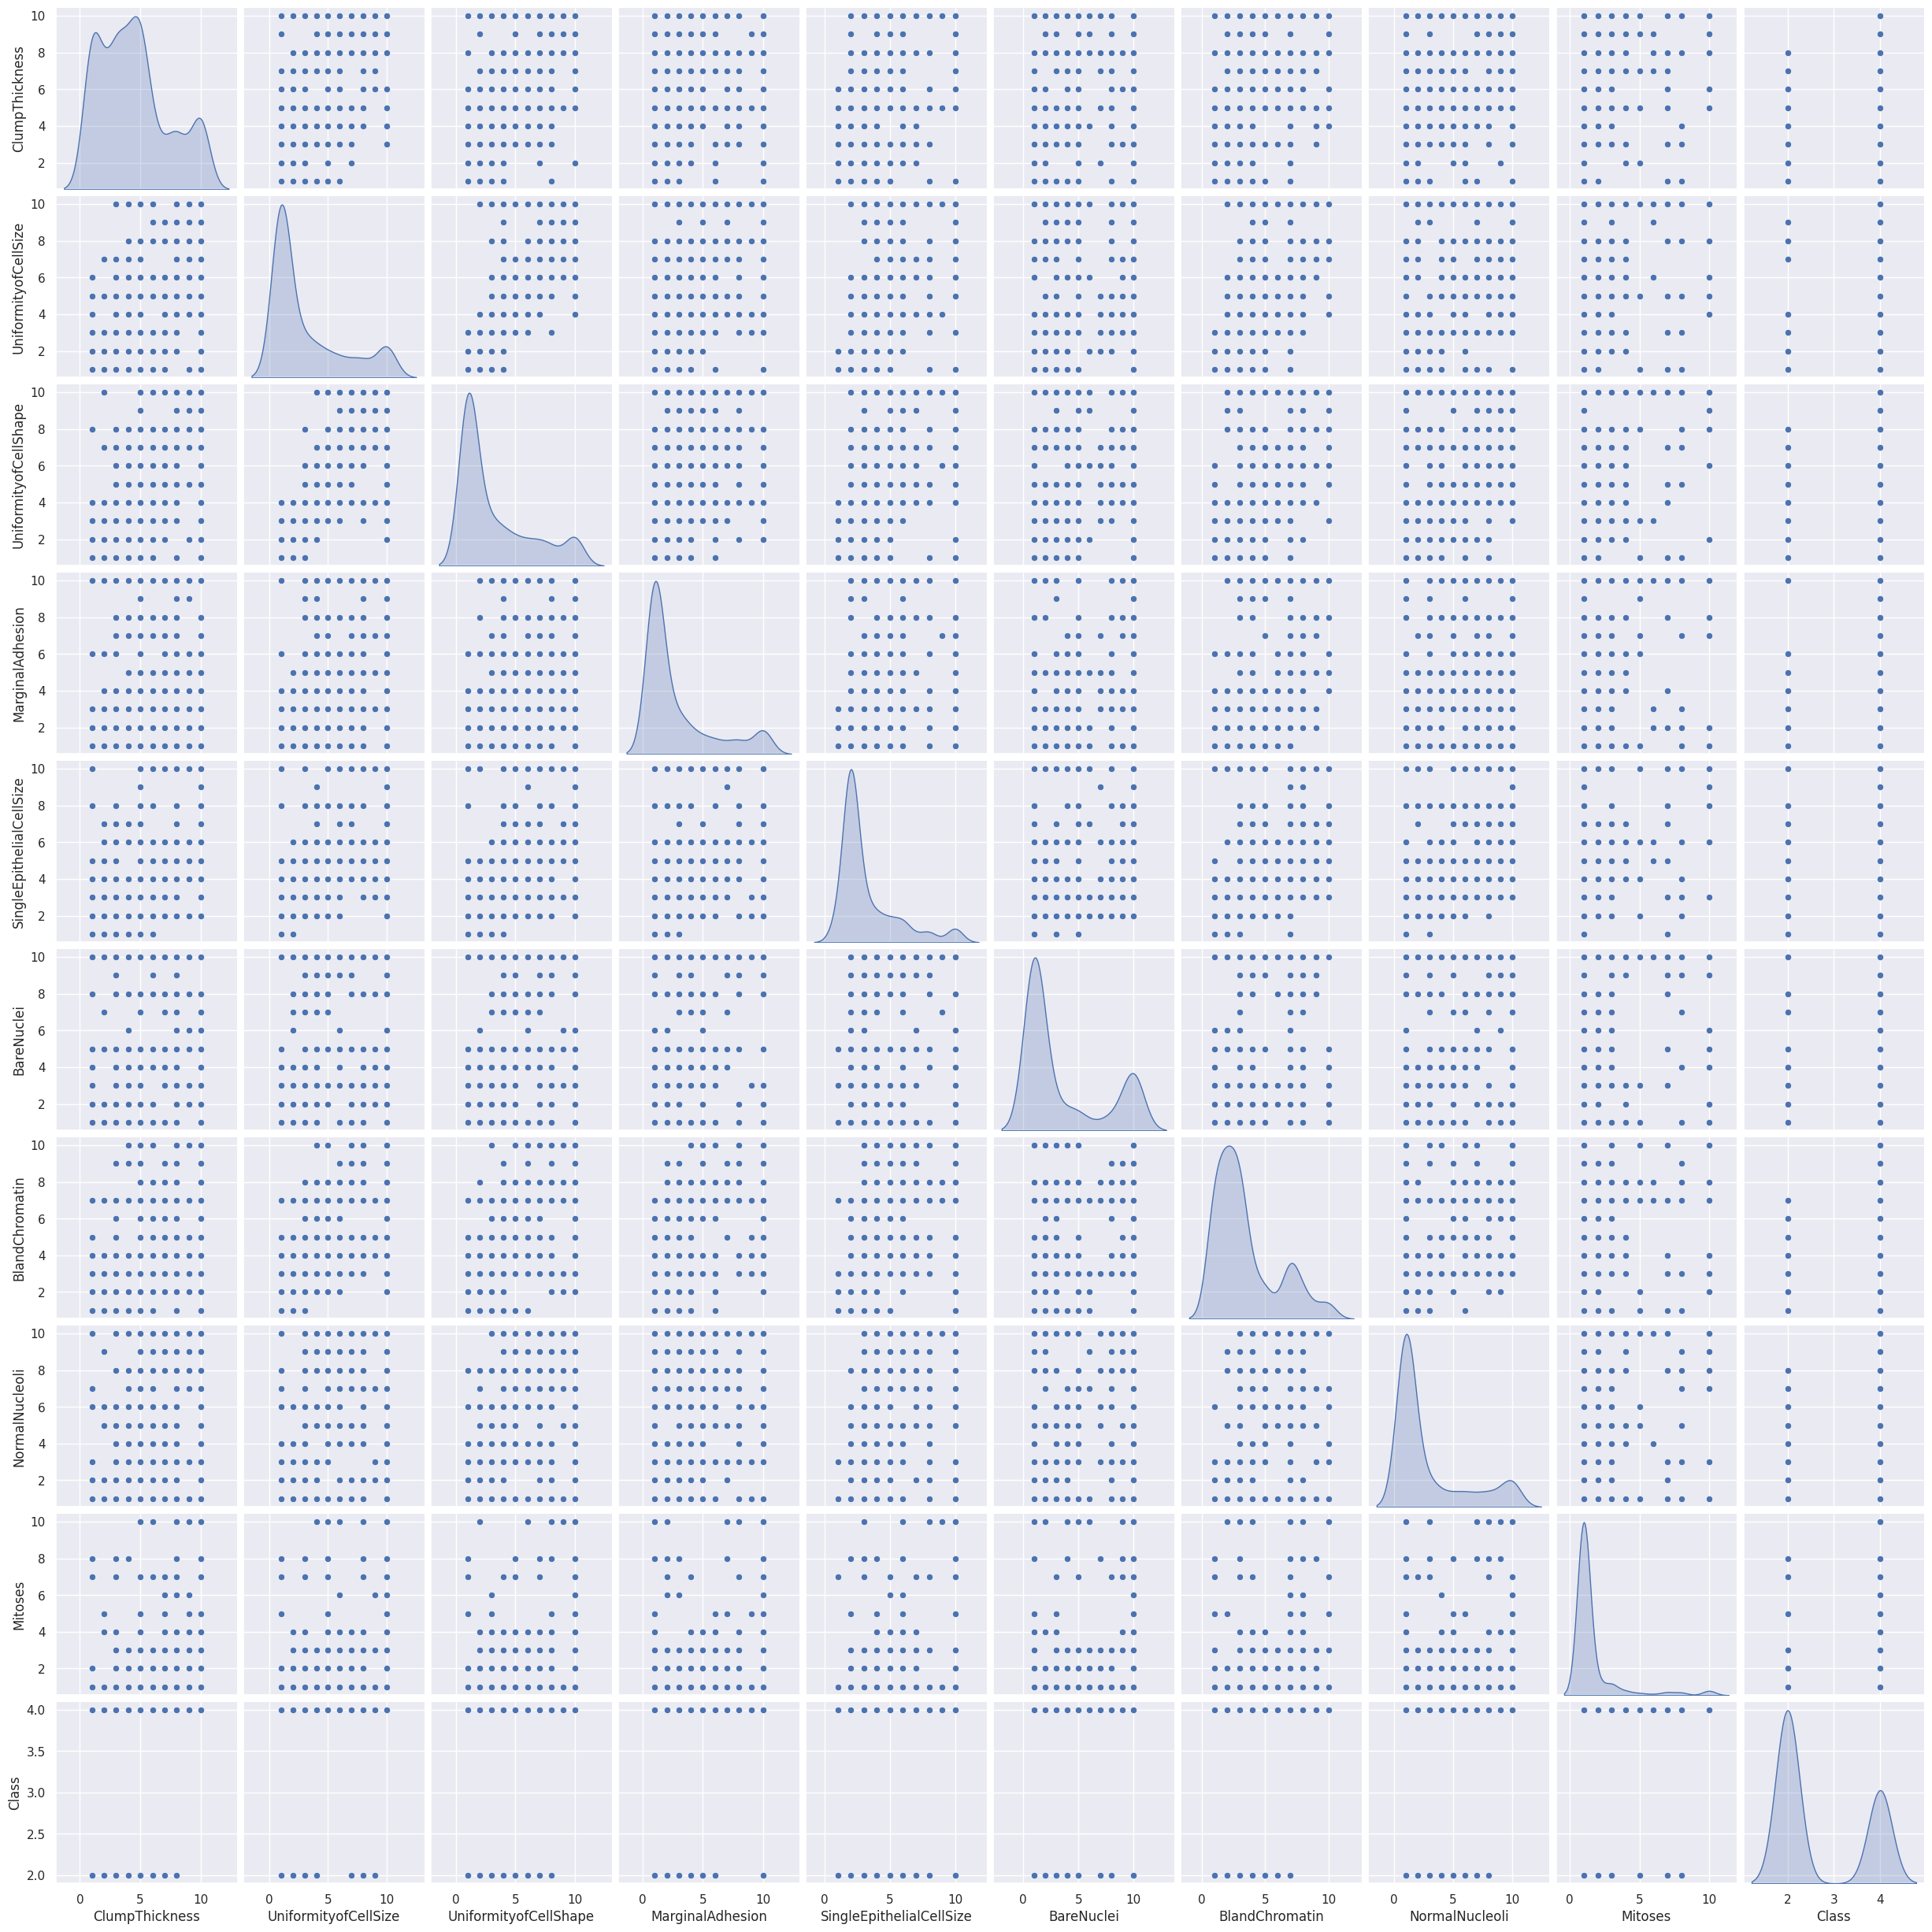

In [146]:
sns.pairplot(df,diag_kind='kde')

In [147]:
#Correlation with output variable
cor_target = abs(cor["Class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

ClumpThickness              0.714790
UniformityofCellSize        0.820801
UniformityofCellShape       0.821891
MarginalAdhesion            0.706294
SingleEpithelialCellSize    0.690958
BareNuclei                  0.822696
BlandChromatin              0.758228
NormalNucleoli              0.718677
Mitoses                     0.423448
Class                       1.000000
Name: Class, dtype: float64

### Train and Test Model

In [148]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets.

Y = df['Class'].values
X = df.drop('Class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

### Model Selection
### Baseline algorithm checking

* Analyse and build a model to predict if a given set of symptoms lead to breast cancer. This is a binary Classification problem, and a few algorithms are appropriate for use.

* As we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform.

* We will use 10 fold cross validation for each testing.

* The following non-linear algorithms will be used, namely:
  * Classification and Regression Trees (CART)
  * Linear Support Vector Machines (SVM)
  * Gaussian Naive Bayes (NB)
  * k-Nearest Neighbors (KNN).

In [149]:
# Testing Options
scoring = 'accuracy'

In [150]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.949734 (Std accuracy is 0.023428)
For SVM Model:Mean accuracy is 0.960239 (Std accuracy is 0.014740)
For NB Model:Mean accuracy is 0.953989 (Std accuracy is 0.020471)
For KNN Model:Mean accuracy is 0.966489 (Std accuracy is 0.016870)


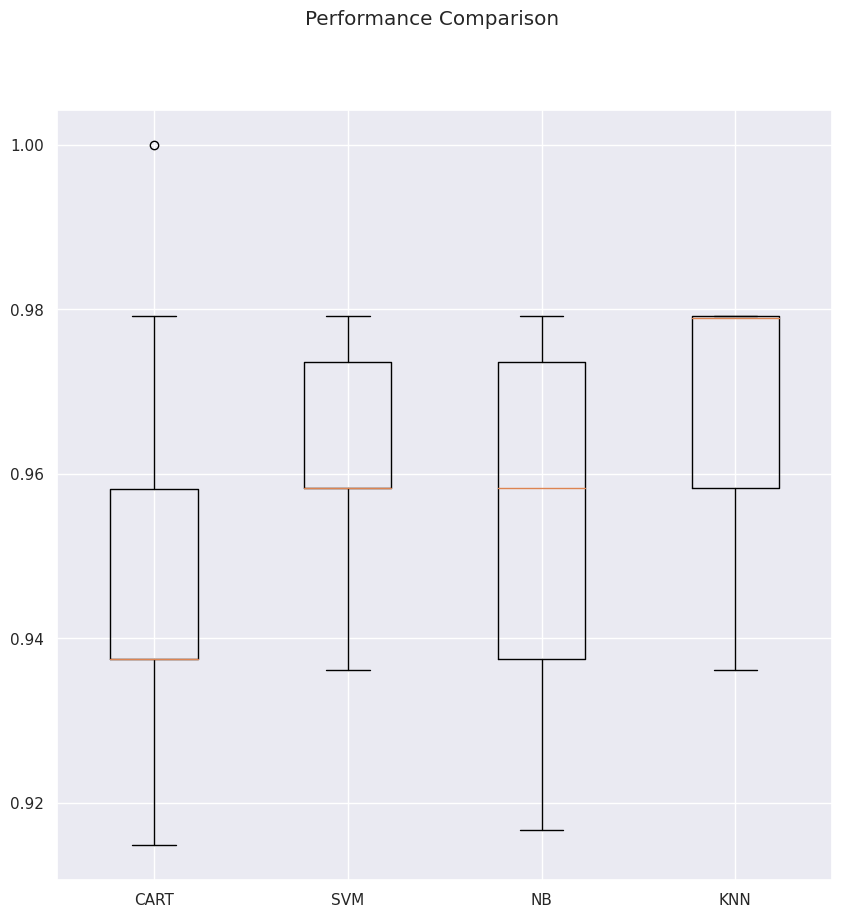

In [151]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

CART, SVM, GaussianNB and KNN  performed the best with  above 95% mean accuracy

In [152]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))

# Accuracy - ratio of correctly predicted observation to the total observations.
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual Class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false


Model: CART
Accuracy score: 0.9317073170731708
Classification report:
               precision    recall  f1-score   support

           2       0.90      1.00      0.95       131
           4       1.00      0.81      0.90        74

    accuracy                           0.93       205
   macro avg       0.95      0.91      0.92       205
weighted avg       0.94      0.93      0.93       205


Model: SVM
Accuracy score: 0.9804878048780488
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.97      0.97      0.97        74

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205


Model: NB
Accuracy score: 0.9804878048780488
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.97 

### Detection result using SVM

In [153]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.9804878048780488


array([4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2])

In [154]:
example_measures = [[2,1,2,4,4,3,1,2,1]]
prediction = clf.predict(example_measures)
print(prediction)
if (prediction[0] == 2):
  print("Tumour is benign, hence the patient does not have breast cancer.")
else:
  print("Tumour is malignant, hence the patient has cancer.")

[2]
Tumour is benign, hence the patient does not have breast cancer.


In [155]:
import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, Classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Classes))
    plt.xticks(tick_marks, Classes, rotation=45)
    plt.yticks(tick_marks, Classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.97      0.97      0.97        74

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

Confusion matrix, without normalization
[[129   2]
 [  2  72]]


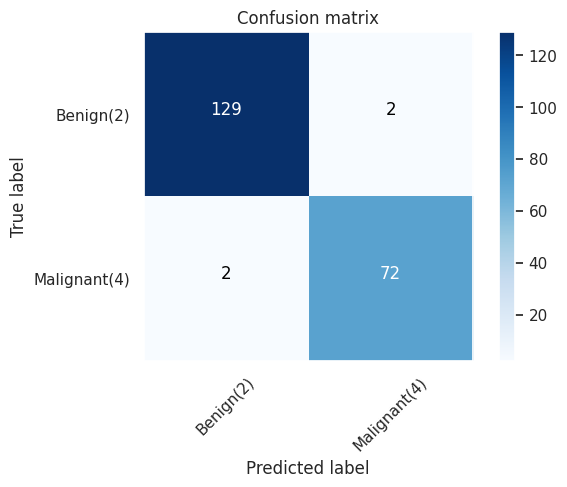

In [156]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, Classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [157]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2,1,2,4,4,3,1,2,1]]))
if (prediction[0] == 2):
  print("Tumour is benign, hence the patient does not have breast cancer.")
else:
  print("Tumour is malignant, hence the patient has cancer.")

[2]
Tumour is benign, hence the patient does not have breast cancer.
